In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as npo
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


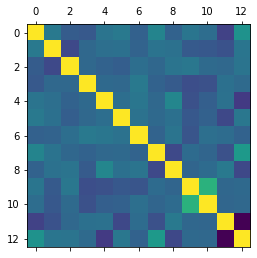

In [9]:
plt.matshow(df.corr())
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df=df.drop(['time'],axis=1)

In [12]:
X=df.drop(['DEATH_EVENT'],axis=1)
y=df[['DEATH_EVENT']]

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [14]:
X.shape

(299, 11)

In [15]:
y.shape

(299, 1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Use the below code If this is the first time using Catboost

In [18]:
pip install catboost

     |████████████████████████████████| 65.9MB 58kB/s 


In [19]:
from catboost import CatBoostClassifier
CB = CatBoostClassifier(iterations=124,learning_rate=0.3018,depth=3)

In [20]:
CB.fit(X_train, y_train,eval_set=(X_test, y_test))

0:	learn: 0.6287759	test: 0.5941956	best: 0.5941956 (0)	total: 48.8ms	remaining: 6s
1:	learn: 0.5943302	test: 0.5596439	best: 0.5596439 (1)	total: 49.5ms	remaining: 3.02s
2:	learn: 0.5645247	test: 0.5306001	best: 0.5306001 (2)	total: 50.3ms	remaining: 2.03s
3:	learn: 0.5464935	test: 0.5095741	best: 0.5095741 (3)	total: 50.9ms	remaining: 1.53s
4:	learn: 0.5310745	test: 0.4775584	best: 0.4775584 (4)	total: 51.5ms	remaining: 1.23s
5:	learn: 0.5237181	test: 0.4752362	best: 0.4752362 (5)	total: 52ms	remaining: 1.02s
6:	learn: 0.5106159	test: 0.4676478	best: 0.4676478 (6)	total: 52.5ms	remaining: 878ms
7:	learn: 0.5026592	test: 0.4574481	best: 0.4574481 (7)	total: 53.1ms	remaining: 770ms
8:	learn: 0.4976305	test: 0.4489197	best: 0.4489197 (8)	total: 53.7ms	remaining: 686ms
9:	learn: 0.4906867	test: 0.4485010	best: 0.4485010 (9)	total: 54.2ms	remaining: 618ms
10:	learn: 0.4841420	test: 0.4404094	best: 0.4404094 (10)	total: 54.8ms	remaining: 563ms
11:	learn: 0.4783287	test: 0.4405575	best: 0.4

In [21]:
pred = CB.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.7833333333333333
[[43  3]
 [10  4]]


In [22]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth=-2, min_child_samples=28, n_estimators=365,
                         num_leaves=16, learning_rate=0.07592)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.07592, max_depth=-2,
               min_child_samples=28, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=365, n_jobs=-1, num_leaves=16, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [23]:
pred1 = clf.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test, pred1))
print(confusion_matrix(y_test, pred1))

0.8
[[40  6]
 [ 6  8]]


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred1)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[40  6]
 [ 6  8]]

True Positives(TP) =  40

True Negatives(TN) =  8

False Positives(FP) =  6

False Negatives(FN) =  6


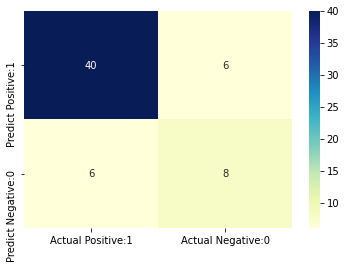

In [25]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        46
           1       0.57      0.57      0.57        14

    accuracy                           0.80        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.80      0.80      0.80        60

